<a href="https://colab.research.google.com/github/uogbonda/Market-Analysis-using-Correlation-and-Regression-analysis/blob/main/StD_Scaler_Campaign_and_Customer_Analysis__22nd_November.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Correlation and Regression Analysis on Customer dataset: Customer Segmentation

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
import datetime as dt



In [ ]:

Current_Date = dt.datetime.today()
print (Current_Date)

2022-11-25 09:47:55.401664


In [ ]:

Previous_Date = dt.datetime.today() - dt.timedelta(days=58)
print (Previous_Date)

2022-09-28 09:47:56.735943


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Original_2240_customer_data.xlsx to Original_2240_customer_data.xlsx


In [ ]:
data=pd.read_excel('Original_2240_customer_data.xlsx')
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
data.shape

(2240, 29)

In [ ]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2020-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2022-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2021-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2022-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2022-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA and Statistical Analysis
We need to answer the following questions:

### **Exploring and Understanding basics data**

Distribution of Data across different accounts

1.   diffrence in campaigning to Education category.
2.   difference in sales using campaigns.


Difference of Sales in Account Types (Using Categorical Mean)
### **Statistical Analysis - Answering the Questions**

1.  Impact of Marketing Strategy on Sales (Using Correlation and Regression). 
2.  Impact of campaign on Sales.

How different types of client can have different strategies (Broken down Question 1 and Question 2 based on Account Type)

In [ ]:
data.Dt_Customer.dtypes

dtype('<M8[ns]')

In [ ]:
data.rename(columns = {'NumWebVisitsMonth' : 'Frequency'}, inplace = True)


In [ ]:
data['Monetary']=(data['MntWines']+ data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds'])
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Monetary
0,5524,1957,Graduation,Single,58138.0,0,0,2020-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,2022-03-08,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,1965,Graduation,Together,71613.0,0,0,2021-08-21,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,1984,Graduation,Together,26646.0,1,0,2022-02-10,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,1981,PhD,Married,58293.0,1,0,2022-01-19,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2021-06-13,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,1946,PhD,Together,64014.0,2,1,2022-06-10,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2022-01-25,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,1956,Master,Together,69245.0,0,1,2022-01-24,8,428,...,0,0,0,0,0,0,3,11,0,843


In [ ]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
Frequency               0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Monetary                0
dtype: int64

## Better way to calculate date is:**

If you have a column with only birth of year of customer, need you datetime with year to calculate

1.   today=date.today()
2.   data['Age']= cars.Year.apply(lambda x: today.year - x)
3.   data.head() 



In [ ]:
data['Age']=2022 - data['Year_Birth']
data.Age.unique()



array([ 65,  68,  57,  38,  41,  55,  51,  37,  48,  72,  39,  46,  63,
        70,  35,  76,  42,  73,  40,  43,  71,  53,  36,  33,  59,  52,
        49,  79,  47,  26,  54,  58,  45,  44,  67,  56,  34,  74,  64,
        50,  62,  77,  31,  60,  69,  61,  66,  30, 122, 129,  32,  75,
       123,  29,  28,  81,  78,  27,  82])

## Replace values in a column..need to put inplace=True.

In [ ]:
#data['Age'] = data['Age'].replace('122','0')
#data['Age'] = data['Age'].replace('129','0')
#data['Age'] = data['Age'].replace('123','0')

data.replace({'Age' : { 122 : 0, 129 : 0, 123: 0}}, inplace=True)
# Replace multiple values
#data.Age = data['Age'].replace(['122','0'],['129','0'], ['123','0'])
data.Age.unique()


array([65, 68, 57, 38, 41, 55, 51, 37, 48, 72, 39, 46, 63, 70, 35, 76, 42,
       73, 40, 43, 71, 53, 36, 33, 59, 52, 49, 79, 47, 26, 54, 58, 45, 44,
       67, 56, 34, 74, 64, 50, 62, 77, 31, 60, 69, 61, 66, 30,  0, 32, 75,
       29, 28, 81, 78, 27, 82])

In [ ]:
 #data['NumDealsPurchases'].value_counts()
 data['NumCatalogPurchases'].value_counts()

0     586
1     497
2     276
3     184
4     182
5     140
6     128
7      79
8      55
10     48
9      42
11     19
28      3
22      1
Name: NumCatalogPurchases, dtype: int64

In [ ]:
#Descriptive Statistics (Age)
data.Age.describe()

count    2240.000000
mean       53.027232
std        11.854284
min         0.000000
25%        45.000000
50%        52.000000
75%        63.000000
max        82.000000
Name: Age, dtype: float64

[Text(0.5, 1.0, 'Monetary distribution')]

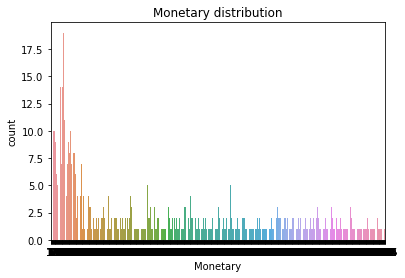

In [ ]:
# Age distribution plot, taking observations which have monetary value less than 53
import seaborn as sns
#x = data['Age'].query('Age < 53')['Age']

#ax = sns.distplot(x)

sns.countplot(x='Monetary',data=data).set(title="Monetary distribution")

[Text(0.5, 1.0, 'Store purchase distribution')]

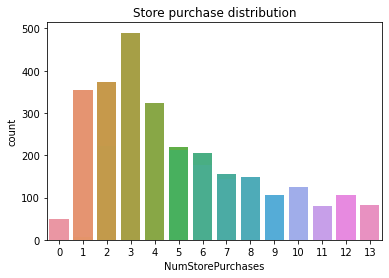

In [ ]:
sns.countplot(x='NumWebPurchases',data=data).set(title="Web purchase distribution")  # NumCatalogPurchases  + NumStorePurchases'
sns.countplot(x='NumStorePurchases',data=data).set(title="Store purchase distribution")

[Text(0.5, 1.0, 'Catalog purchase distribution')]

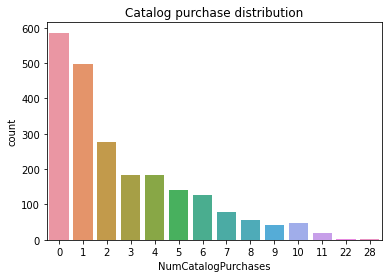

In [ ]:
sns.countplot(x='NumCatalogPurchases',data=data).set(title="Catalog purchase distribution")

### **Standardize the data because they are all right- skewed. Skew is meant to be between 0 - 1.**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc =StandardScaler()

In [ ]:
#df_cancer1=df_cancer.drop(df_cancer.columns[[0,1]],axis=1).to_numpy() # Remember anytime you run this cell it deletes next columns, 
# So anytime we run this platform copy and paste this code again.
#X=df_cancer1
#sc =StandardScaler()
#X=sc.fit_transform(X)


mc=MinMaxScaler()


In [ ]:
df=data[['Monetary','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'Response']]
#df=sc.fit_transform(df['Monetary'])
df_minmax=pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df),columns=df.columns)
df_minmax.head(2)

,Monetary,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response
0,0.639683,0.0,0.0,0.0,0.0,0.0,1.0
1,0.008730,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#df_minmax=df_minmax.join(data['Education'])
df_minmax.head(2)

,Monetary,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Education
0,0.639683,0.0,0.0,0.0,0.0,0.0,1.0,Graduation
1,0.008730,0.0,0.0,0.0,0.0,0.0,0.0,Graduation


In [ ]:
y=df_minmax.Monetary
X=df_minmax.drop(columns=['Monetary','Education']).assign(const=1)

results_a = sm.OLS(y,X).fit()
print(results_a.summary())

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     143.4
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          4.80e-154
Time:                        09:49:02   Log-Likelihood:                 393.25
No. Observations:                2240   AIC:                            -772.5
Df Residuals:                    2233   BIC:                            -732.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
AcceptedCmp1     0.1963      0.020      9.965   

## **Correlation Analysis**

In [ ]:
## Consolidated Strategy for Targeting
        
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(df_minmax[['Monetary',
'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response'
       ]].corr()['Monetary']).reset_index()
correlation_analysis.columns=['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis=correlation_analysis[correlation_analysis['Impacting Variable']!='Monetary']
correlation_analysis=correlation_analysis.sort_values('Degree of Linear Impact (Correlation)',ascending=False)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if sys.path[0] == '':


,Impacting Variable,Degree of Linear Impact (Correlation)
5,AcceptedCmp5,0.47
1,AcceptedCmp1,0.38
6,Response,0.27
4,AcceptedCmp4,0.25
2,AcceptedCmp2,0.14
3,AcceptedCmp3,0.05


## **Market Strategy Impact on **Campaigns** (Broken by different account type)**

In [ ]:
# Import seaborn library
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
correlation_analysis=pd.DataFrame(df_minmax.groupby('Education')[['Monetary','AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'Response']].corr()['Monetary']).reset_index()
correlation_analysis=correlation_analysis.sort_values(['Education','Monetary'],ascending=False)
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis=correlation_analysis[correlation_analysis['Variable Impact on Sales']!='Monetary'].reset_index(drop=True)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  if __name__ == '__main__':


,Acc Type,Variable Impact on Sales,Impact
0,PhD,AcceptedCmp5,0.41
1,PhD,AcceptedCmp1,0.26
2,PhD,Response,0.26
3,PhD,AcceptedCmp4,0.21
4,PhD,AcceptedCmp2,0.10
5,PhD,AcceptedCmp3,-0.02
6,Master,AcceptedCmp5,0.51
7,Master,AcceptedCmp1,0.38
8,Master,Response,0.26
9,Master,AcceptedCmp4,0.23


## **Regression Analysis (Market Sales and Strategies)**

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
data.columns=[mystring.replace(" ", "_") for mystring in data.columns]
data.columns=[mystring.replace("(", "") for mystring in data.columns]
data.columns=[mystring.replace(")", "") for mystring in data.columns]

results = smf.ols('Monetary ~ AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response',data=df_minmax).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     143.4
Date:                Fri, 25 Nov 2022   Prob (F-statistic):          4.80e-154
Time:                        09:49:19   Log-Likelihood:                 393.25
No. Observations:                2240   AIC:                            -772.5
Df Residuals:                    2233   BIC:                            -732.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.1896      0.005     39.027   

### we used this to bring the Regression table into pandas dataframe for the next type.

In [ ]:
df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0]


## Next, check columns that have P-values less than 0.95....Looking up on the Regression table (y=mx +b), campaign phone had 0.94 in column P > |t|

In [ ]:
df=df.reset_index()
df=df[df['P>|t|']<0.05][['index','coef']]
df

,index,coef
0,Intercept,0.1896
1,AcceptedCmp1,0.1963
4,AcceptedCmp4,0.0798
5,AcceptedCmp5,0.3110
6,Response,0.0564


In [ ]:
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(data['Education']))):
    temp_data=df_minmax[df_minmax['Education']==acctype].copy()
    results = smf.ols('Monetary ~ AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    print(acctype)
    consolidated_summary=consolidated_summary.append(df)
    print(df)
    #print(results.summary())
    

Basic
Empty DataFrame
Columns: [Variable, Coefficent (Impact), Account Type]
Index: []
Graduation
       Variable  Coefficent (Impact) Account Type
5  AcceptedCmp5               0.3116   Graduation
1  AcceptedCmp1               0.2159   Graduation
4  AcceptedCmp4               0.0635   Graduation
6      Response               0.0479   Graduation
PhD
       Variable  Coefficent (Impact) Account Type
5  AcceptedCmp5               0.2970          PhD
6      Response               0.0891          PhD
2n Cycle
       Variable  Coefficent (Impact) Account Type
5  AcceptedCmp5               0.2860     2n Cycle
1  AcceptedCmp1               0.2782     2n Cycle
4  AcceptedCmp4               0.2733     2n Cycle
Master
       Variable  Coefficent (Impact) Account Type
5  AcceptedCmp5               0.3636       Master
1  AcceptedCmp1               0.2577       Master


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
consolidated_summary=pd.DataFrame()
for acctype in list(set(list(df_minmax['Education']))):
    print(acctype)
    temp_data=df_minmax[df_minmax['Education']==acctype].copy()
    results = smf.ols('Monetary ~ AcceptedCmp1 + AcceptedCmp2 + AcceptedCmp3 + AcceptedCmp4 + AcceptedCmp5 + Response', data=temp_data).fit()
    df = pd.read_html(results.summary().tables[1].as_html(),header=0,index_col=0)[0].reset_index()
    df=df[df['P>|t|']<0.05][['index','coef']]
    df.columns=['Variable','Coefficent (Impact)']
    df['Account Type']=acctype
    df=df.sort_values('Coefficent (Impact)',ascending=False)
    df=df[df['Variable']!='Intercept']
    consolidated_summary=consolidated_summary.append(df)
    print(results.summary())

Basic
                            OLS Regression Results                            
Dep. Variable:               Monetary   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.1920
Date:                Thu, 24 Nov 2022   Prob (F-statistic):              0.826
Time:                        12:24:38   Log-Likelihood:                 87.056
No. Observations:                  54   AIC:                            -168.1
Df Residuals:                      51   BIC:                            -162.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0320      0.007      4.

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


# Final Recommendation


#### Using the below table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend. 

#### <b>Case Explanation - Basic </b><br>
Clients with Basic education do not have a particular campaign that appeals to them. Without using any campaigns for Basic clients, we get 0.03 unit sales.

#### <b>Case Explanation - Graduation </b><br>
Accepted campaigns are 5,1,4 and last campaign(Response).

#### <b>Case Explanation - PhD </b><br>
Campaign 5 and Response.

#### <b>Case Explanation - 2n Cycle </b><br>
These are clients in their 2nd level in university. Only campaign 5,1 and 4 is best.

#### <b>Case Explanation - Master </b><br>

Only campaign 5 and 1 works.


In [ ]:
consolidated_summary

,Variable,Coefficent (Impact),Account Type
5,AcceptedCmp5,0.3116,Graduation
1,AcceptedCmp1,0.2159,Graduation
4,AcceptedCmp4,0.0635,Graduation
6,Response,0.0479,Graduation
5,AcceptedCmp5,0.2970,PhD
6,Response,0.0891,PhD
5,AcceptedCmp5,0.2860,2n Cycle
1,AcceptedCmp1,0.2782,2n Cycle
4,AcceptedCmp4,0.2733,2n Cycle
5,AcceptedCmp5,0.3636,Master


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:


target_col=df_minmax[['Monetary']]
y=target_col

X=df_minmax[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']]

lr=LinearRegression()

lr.fit(X,y)




LinearRegression()

In [ ]:
lr.coef_


array([[ 0.20943039, -0.01869893,  0.0115606 ,  0.08540705,  0.32710602]])

In [ ]:
lr.intercept_

array([0.1941876])